In [4]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## MINST

In [5]:
# Import and split MNIST dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### I. Random forest classification

In [6]:
### Reshape dataset into 2d array
train_nsamples, train_nx, train_ny = train_images.shape
test_nsamples, test_nx, test_ny = test_images.shape
d2_train_images = train_images.reshape((train_nsamples, train_nx*train_ny))
d2_test_images = test_images.reshape((test_nsamples, test_nx*test_ny))

In [7]:
### Load and train random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
rf_clf.fit(d2_train_images, train_labels)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

In [8]:
### Evaluate the random forest classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_pred = rf_clf.predict(d2_test_images)
score = accuracy_score(test_labels, rf_pred)
print("Accuracy score of using random forest classifier", score)

print ("Classification Report")
print(classification_report(test_labels, rf_pred))

print ("Confusion Report")
print(confusion_matrix(test_labels, rf_pred))

Accuracy score of using random forest classifier 0.9638
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.95      0.96      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.94      0.94       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion Report
[[ 970    0    0    1    1    1    2    1    3    1]
 [   0 1123    3    2    0    2    3    1    1    0]
 [   7    0 1001    5    2    1    3    

### II. Neural network classification

In [9]:
from keras import backend as k
from keras.layers import Input
from tensorflow.keras.utils import to_categorical

### Speciify input format
if k.image_data_format() == 'channels_first':
   cnn_train_images = train_images.reshape(train_images.shape[0], 1, train_nx, train_ny)
   cnn_test_images = test_images.reshape(test_images.shape[0], 1, test_nx, test_ny)
   inpx = (1, train_nx, train_ny)
else:
   cnn_train_images = train_images.reshape(train_images.shape[0], train_nx, train_ny, 1)
   cnn_test_images = test_images.reshape(test_images.shape[0], test_nx, test_ny, 1)
   inpx = (train_nx, train_ny, 1)

inpx = Input(shape = inpx)

### Transform image array into [0,1]
normcnn_train_images = cnn_train_images.astype('float32')/255
normcnn_test_images = cnn_test_images.astype('float32')/255

### Transform lables from integers into binary
cat_train_labels = to_categorical(train_labels)
cat_test_labels = to_categorical(test_labels)

In [10]:
### Build CNN
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Model

layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

network = Model([inpx], layer7)
network.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
### Visualize the model architecture
network.summary()

from keras.utils.vis_utils import plot_model
plot_model(network, show_shapes = True, show_layer_names = True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                             

In [12]:
### Train CNN
history = network.fit(normcnn_train_images, cat_train_labels, epochs = 8, batch_size = 500, validation_split=0.1)

Epoch 1/8
108/108 [==============================] - 56s 515ms/step - loss: 0.5475 - accuracy: 0.8438 - val_loss: 0.1208 - val_accuracy: 0.9680
Epoch 2/8
108/108 [==============================] - 71s 659ms/step - loss: 0.1274 - accuracy: 0.9650 - val_loss: 0.0656 - val_accuracy: 0.9828
Epoch 3/8
108/108 [==============================] - 93s 859ms/step - loss: 0.0844 - accuracy: 0.9756 - val_loss: 0.0536 - val_accuracy: 0.9865
Epoch 4/8
108/108 [==============================] - 85s 783ms/step - loss: 0.0645 - accuracy: 0.9819 - val_loss: 0.0453 - val_accuracy: 0.9878
Epoch 5/8
108/108 [==============================] - 83s 767ms/step - loss: 0.0524 - accuracy: 0.9850 - val_loss: 0.0409 - val_accuracy: 0.9890
Epoch 6/8
108/108 [==============================] - 81s 746ms/step - loss: 0.0453 - accuracy: 0.9869 - val_loss: 0.0381 - val_accuracy: 0.9900
Epoch 7/8
108/108 [==============================] - 84s 783ms/step - loss: 0.0402 - accuracy: 0.9883 - val_loss: 0.0370 - val_accuracy:

313/313 [==============================] - 6s 19ms/step - loss: 0.0305 - accuracy: 0.9900
Accuracy score of using CNN 0.9900000095367432


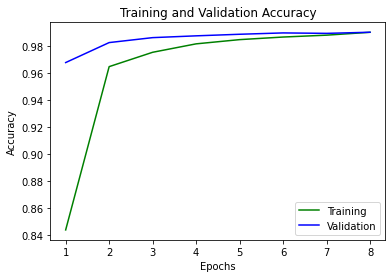

In [13]:
### Evaluate the neural network classifier
CNN_pred = network.predict(normcnn_test_images)
test_loss, test_acc = network.evaluate(normcnn_test_images, cat_test_labels)
print("Accuracy score of using CNN", test_acc)

acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,9)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'best')
plt.show()